# The Elements of Statistical Learning - Chapter 3 Exercises

## Exercise 3.1

Show that the $F$ statistic (3.13) for dropping a single coefficient from a model is equal to the square of the corresponding $z$-score (3.12).

### Solution

Without loss of generality, assume that the smaller model has had the final feature $\mathbf{x}_p$ removed. Let $\hat{\mathbf{y}}$ denote the least squares approximation for the larger model and $\hat{\mathbf{y}}^{\prime}$ be that for the smaller. We need to show that

\begin{equation}
    \frac{\text{RSS}_0 - \text{RSS}_1}{\text{RSS}_1 / (N-p-1)} = \frac{\hat{\beta}_p^2}{\hat{\sigma}^2 v_p},
\end{equation}

where $v_j$ is the $j$th diagonal element of $(\mathbf{X}^T \mathbf{X})^{-1}$. 

First note that by definition $\hat{\sigma}^2 = \text{RSS}_0 / (N-p-1)$. Moreover, since $\hat{\mathbf{y}}$ is the projection of $\mathbf{y}$ onto the column space of $\mathbf{X}$, their difference is orthogonal to any element of the columns space. In particular, it is orthogonal to $\hat{\mathbf{y}} - \hat{\mathbf{y}}^{\prime}$, so

\begin{equation}
    \lVert \mathbf{y} - \hat{\mathbf{y}}^{\prime} \rVert^2
         = \lVert \mathbf{y} - \hat{\mathbf{y}} \rVert^2 
        + \lVert \hat{\mathbf{y}} - \hat{\mathbf{y}}^{\prime} \rVert^2
\end{equation}

\begin{equation}
    \Rightarrow \text{RSS}_0 - \text{RSS}_1
         = \lVert \mathbf{y} - \hat{\mathbf{y}}^{\prime} \rVert^2 
            - \lVert \mathbf{y} - \hat{\mathbf{y}} \rVert^2
         = \lVert \hat{\mathbf{y}} - \hat{\mathbf{y}}^{\prime} \rVert^2.
\end{equation}

Now let $\mathbf{z}_0,\ldots ,\mathbf{z}_p$ denote the orthogonal basis of the column space of $\mathbf{X}$, obtained from $\mathbf{x}_0,\ldots,\mathbf{x}_p$ using the Gram-Schmidt process (Algorithm 3.1). The least squares estimates  $\hat{\mathbf{y}}$ and $\hat{\mathbf{y}}^{\prime}$ are the projections of $\mathbf{y}$ onto the column space of $\mathbf{X}$ and

\begin{equation}
    \text{span}(\{\, \mathbf{x}_j \,\mid\, 0\leq j\leq p-1 \,\} = \text{span}(\{\, \mathbf{z}_j \,\mid\, 0\leq j\leq p-1 \,\}
\end{equation}

respectively. Since the $\mathbf{z}_j$ are orthogonal, this implies that

\begin{equation}
    \hat{\mathbf{y}} - \hat{\mathbf{y}}^{\prime} = \frac{\langle \mathbf{z}_p, \mathbf{y}\rangle}{\langle \mathbf{z}_p, \mathbf{z}_p\rangle}\mathbf{z}_p = \hat{\beta}_p \mathbf{z}_p.
\end{equation}

Putting these elements together, it just remains to show that $v_p = \lVert \mathbf{z}_p\rVert ^{-2}$. But, if $\mathbf{X} = \mathbf{Q}\mathbf{R}$ is the QR-decomposition of $\mathbf{X}$ then $(\mathbf{X}^T \mathbf{X})^{-1} = \mathbf{R}^{-1}(\mathbf{R}^{-1})^T$. Since $\mathbf{R}$ is upper-triangular, the $p$th diagonal element of $\mathbf{R}^{-1}$ is $R_{pp}^{-1} = \lVert \mathbf{z}_p\rVert ^{-1}$ and the claim follows.

## Exercise 3.2

Given data on two variables $X$ and $Y$, consider fitting a cubic polynomial regression model $f(X) = \sum_{j=0}^3\beta_jX^j$. In addition to plotting the fitted curve, you would like a 95% confidence band about the curve. Consider the following two approaches:

1. At each point $x_0$, form a 95% confidence interval for the linear function $a^T\beta = \sum_{j=0}^3 \beta_jx_0^j$.
2. Form a 95% confidence set for $\beta$ as in (3.15), which in turn generates confidence intervals for $f(x_0)$.

How do these approaches differ? Which band is likely to be wider? Conduct a small simulation experiment to compare the two methods.

### Solution

#### Construction of Confidence Intervals

Let $p=3$ and $\alpha=0.05$ and write $x = (1, x_0, x_0^2, x_0^3)$.

**1.** We have $\beta\sim\mathcal{N}(\hat{\beta}, \sigma^2\mathbf{I})$, so

\begin{equation}
    x^T(\hat{\beta}-\beta)\sim\mathcal{N}(0,x^T(\mathbf{X}^T\mathbf{X})^{-1}x\sigma^2).
\end{equation}

Let $v = x^T(\mathbf{X}^T\mathbf{X})^{-1}x\in\mathbf{R}$. Then

\begin{equation}
    \frac{x^T(\hat{\beta} - \beta)}{\hat{\sigma}\sqrt{v}}\sim t_{N-p-1},
\end{equation}

where $\hat{\sigma}$ is the unbiased estimate for $\sigma$ on p.47. Therefore, a $100(1-\alpha)$% confidence interval for $f(x_0) = x^T\beta$ has endpoints

\begin{equation}
    \hat{f}(x_0) \pm \hat{\sigma}\sqrt{x^T(\mathbf{X}^T\mathbf{X})^{-1}x}~t_{N-p-1,\alpha/2}
\end{equation}

where $\hat{f}(x_0) = x^T\hat{\beta}$ and $t_{N-p-1,\alpha/2}$ is the $\frac{1}{2}\alpha$th percentile of a $T$ distribution with $N-p-1$ degrees of freedom.

**2.** By the argument on p.49, an approximate 95% confidence set for $f(x_0)$ is the set of $x^T\beta$ such that $\beta$ lies in 

\begin{equation}
    C = \big\{\, \beta \,\big| \, \lVert \mathbf{X}(\beta - \hat{\beta})\rVert^2 \leq \hat{\sigma}^2\chi^2 \,\big\},
\end{equation}

where $\chi^2 = \chi_{p+1,\alpha}^2$ is the $\alpha$th percentile of a chi-squared distribution with $p+1$ degrees of freedom.

First note that $C$ is an ellipsoid in $\mathbb{R}^{p+1}$. This implies that the restriction of the linear function $x^T\beta$ to $C$ achieves its maximum and minimum on the boundary $\partial C$ of $C$ and takes every value in between. In particular, $\{ x^T\beta\mid\beta\in C\}$ is an interval and the endpoints of this interval are the maximum and minimum of $x^T\beta$ subject to the constraint $\beta\in\partial C$, or equivalently

\begin{equation}
    \lVert \mathbf{X}(\beta - \hat{\beta})\rVert^2 = \hat{\sigma}^2\chi^2.
\end{equation}

We solve this problem using Lagrange multipliers. Let

\begin{equation}
    \mathcal{L}(\beta,\lambda) = x^T\beta - \lambda\left(\lVert \mathbf{X}(\beta - \hat{\beta})\rVert^2 - \hat{\sigma}^2\chi^2\right).
\end{equation}

This has gradient $\nabla \mathcal{L} = (\frac{\partial \mathcal{L}}{\partial \beta},\frac{\partial\mathcal{L}}{\partial \lambda})$ with

\begin{equation}
    \frac{\partial \mathcal{L}}{\partial \beta} = x - 2\lambda\mathbf{X}^T(\mathbf{X}\beta - \mathbf{X}\hat{\beta}),
        \qquad \frac{\partial\mathcal{L}}{\partial \lambda} = \lVert \mathbf{X}(\beta - \hat{\beta})\rVert^2 - \hat{\sigma}^2\chi^2.
\end{equation}

Any solution to our optimisation problem will have $\nabla\mathcal{L}=0$. Setting the first partial derivative equation to zero gives

\begin{equation}
    \mathbf{X}^T\mathbf{X}(\beta-\hat{\beta}) = \frac{1}{2\lambda}x 
        \quad\Rightarrow\quad \beta = \hat{\beta} + \frac{1}{2\lambda} \mathbf{X}^T\mathbf{X}x.
\end{equation}

Setting $\frac{\partial\mathcal{L}}{\partial \lambda}=0$ and substituting this in give

\begin{equation}
    \Big\lVert \frac{1}{2\lambda}\mathbf{X}(\mathbf{X}^T\mathbf{X})^{-1}x\Big\rVert^2 = \hat{\sigma}^2\chi^2
        \quad\Rightarrow\quad \frac{1}{2\lambda} = \pm \frac{\hat{\sigma}\chi}{\lVert \mathbf{X}(\mathbf{X}^T\mathbf{X})^{-1}x\rVert}.
\end{equation}

So, since we know the optimisation problem has a maximuma and a minimum, they must occur at

\begin{equation}
    \beta = \hat{\beta} \pm \hat{\sigma}\frac{(\mathbf{X}^T\mathbf{X})^{-1}x}{\lVert \mathbf{X}(\mathbf{X}^T\mathbf{X})^{-1}x\rVert}\chi.
\end{equation}

Therefore, the confidence interval for $f(x_0)$ has endpoints

\begin{equation}
    \hat{f}(x_0) \pm \hat{\sigma}\frac{x^T(\mathbf{X}^T\mathbf{X})^{-1}x}{\lVert \mathbf{X}(\mathbf{X}^T\mathbf{X})^{-1}x\rVert}\chi_{p+1,\alpha}.
\end{equation}

#### Comparison

The key difference is that the first method gives a $100(1-\alpha)$% confidence interval at a *particular* $x_0$.  That is, for a fixed $x_0$ the probability that $f(x_0)$ lies inside the confidence bands is $1-\alpha$. The second method starts with a $100(1-\alpha)$% confidence set for $\beta$ and so is valid for all $x_0$ simultaneously. More precisely, there is a probability of $1-\alpha$ that $\beta$ lies in the confidence set and thus $f(x_0)$ lies in the confidence interval *for all $x_0$*.

A less important distinction is that first method is exact (given the assumptions), whereas the second uses the approximation of $t_{N-p-1}$ by the standard normal distribution $p+1$ times. The $T$ distribution is less peaked than the standard normal, $t_{k, \alpha} > z_{\alpha}$ for $\alpha<0.5$, but for $N$ sufficiently large the difference will be insignificant.

Both of these differences imply that the chi-squared confidence interval should be wider.

#### Simulation

The following function from a custom module calculates and prints the confidence bands from the two methods against the regression function $f(x_0)$. We use a simulated data set of size $N$ with $X$ sampled from a normal distribution with mean `xmean` and standard deviation `xstdev`, and show the $100(1-\alpha)$% confidence bands for $x_0$ in the range `plot_range` (=`xmean`$\pm 2$`xstdev` by default).

Beta: [-1, -3, 1, 1]
Betahat: [-1.038 -3.325  1.024  1.113]


RSS:  112.8
Standard error:  1.084


Endpoints of 95.0% confidence interval at xmean = 0:
T method:  [-1.319, -0.756]
Chi-square method:  [-1.475, -0.601]


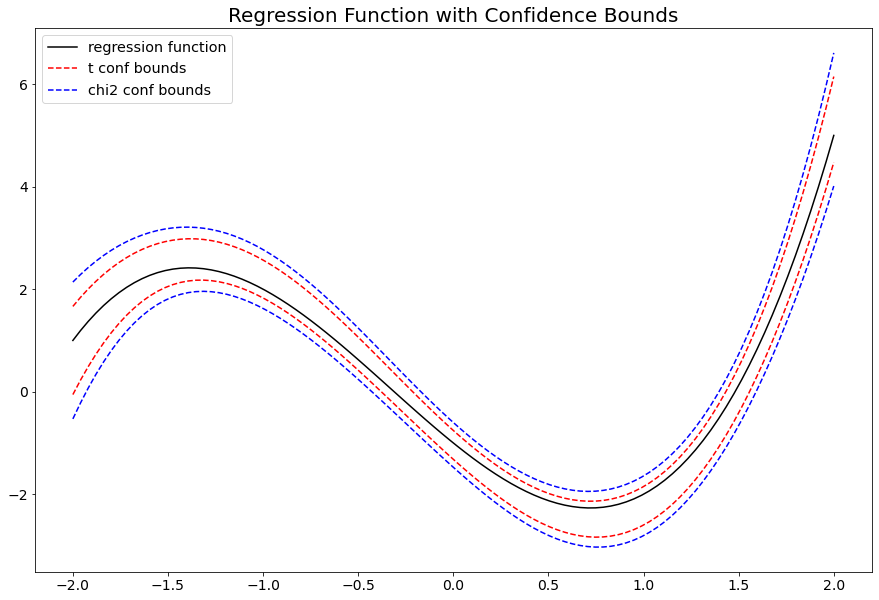

In [18]:
from conf_band_sim import run_sim

beta = [-1, -3, 1, 1]
N = 100
sigma = 1
xmean = 0
xstdev = 1
alpha = 0.05
plot_range = None

run_sim(beta, alpha, N, sigma, xmean, xstdev, plot_range = plot_range)

## Exercise 3.3

Gauss–Markov theorem:

**(a)** Prove the Gauss–Markov theorem: the least squares estimate of a parameter $a^T \beta$ has variance no bigger than that of any other linear unbiased estimate of $a^T \beta$ (Section 3.2.2).

**(b)** The matrix inequality $\mathbf{B} \preccurlyeq \mathbf{A}$ holds if $\mathbf{A} − \mathbf{B}$ is positive semidefinite. Show that if $\hat{\mathbf{V}}$ is the variance-covariance matrix of the least squares estimate of $\beta$ and $\tilde{\mathbf{V}}$ is the variance-covariance matrix of any other linear unbiased estimate, then $\hat{\mathbf{V}} \preccurlyeq \tilde{\mathbf{V}}$ .

### Solution

**(a)** Let $\theta = a^T\beta$. The least squares estimator $\hat{\beta}$ of $\beta$ satisfies $\hat{\beta}\sim\mathcal{N}(\beta, \sigma^2(\mathbf{X}^T\mathbf{X})^{-1})$ so the least squares estimate $\hat{\theta} = a^T\hat{\beta}$ of $\theta$ has

\begin{equation}
    \text{Var}(\hat{\theta}) = \sigma^2a^T(\mathbf{X}^{-1}\mathbf{X})^{-1}a.
\end{equation}

Suppose $\tilde{\theta}=c^T\mathbf{y}$ is a linear unbiased estimator of $\theta$. Then

\begin{equation}
    \mathbf{y}\sim\mathcal{N}(\mathbf{X}\beta,\sigma^2I_N)
        \quad\Rightarrow\quad \tilde{\theta}\sim\mathcal{N}(c^T\mathbf{X}\beta, \sigma^2c^Tc).
\end{equation}

Since $\tilde{\theta}$ is unbiased for $\theta$,

\begin{equation}
    \text{E}(\tilde{\theta})=\theta
        \quad\Rightarrow\quad c^T\mathbf{X}\beta = a^T\beta
        \quad\Rightarrow\quad (c^T\mathbf{X} - a^T)\beta = 0.
\end{equation}

But this must hold for *every* $\beta\in\mathbb{R}^{p+1}$, so $c^T\mathbf{X} = a^T$. 

We have reduced the problem to showing that if $c^T\mathbf{X} = a^T$ then $c^Tc\geq a^T(\mathbf{X}^T\mathbf{X})^{-1}a$. We will establish this by showing that $a^T(\mathbf{X}^T\mathbf{X})^{-1}a$ is a global minimum for $\lVert c\rVert^2$ subject to the constraint $c^T\mathbf{X} = a^T$.

First, observe that a minimum exists since the solution set is non-empty (consider $c = (\mathbf{X}^{-1}\mathbf{X})^{-1}\mathbf{X}^T$), bounded below by 0, and closed. We will find it using Lagrange multipliers.

Let $\lambda\in\mathbb{R}^{p+1}$ be variables and define

\begin{equation}
    \mathcal{L}(c,\lambda) = \lVert c\rVert^2 = \lambda^T(\mathbf{X}^Tc - a).
\end{equation}

This satisfies

\begin{equation}
    \frac{\partial\mathcal{L}}{\partial c} = 2c - \mathbf{X}\lambda,
        \qquad \frac{\partial\mathcal{L}}{\partial c} = \mathbf{X}^Tc - a.
\end{equation}

At an extremum of our optimisation problem both of these are zero, so

\begin{align}
    c = \frac{1}{2}\mathbf{X}\lambda
        & \quad\Rightarrow\quad \frac{1}{2}\mathbf{X}^T\mathbf{X}\lambda = a \\
        & \quad\Rightarrow\quad \lambda = 2(\mathbf{X}^T\mathbf{X})^{-1}a \\
        & \quad\Rightarrow\quad c = \mathbf{X}(\mathbf{X}^T\mathbf{X})^{-1}a \\
        & \quad\Rightarrow\quad \tilde{\theta} = c^T\mathbf{y} = \hat{\theta}.
\end{align}

Since the Lagrange multiplier has a unique solution, this must be the global minimum of the constrained optimisation problem. In fact we have proved something slightly stronger: that $\hat{\theta}$ is the unique unbiased estimator with minimal variance.

**(b)** Our proof is analogous to that in part (a). The covariance matrix of $\hat{\beta}$ is $\text{Var}(\hat{\beta}) = \sigma^2(\mathbf{X}^T\mathbf{X})^{-1}$. If $\tilde{\beta} = \mathbf{A}\mathbf{y}$ is another unbiased estimator for $\beta$ then $\tilde{\beta} \sim \mathcal{N}(\mathbf{A}\mathbf{X}\beta, \sigma^2\mathbf{A}\mathbf{A}^T)$. Since $\tilde{\beta}$ is unbiased, $\mathbf{A}\mathbf{X}\beta = \beta$ for all $\beta\in\mathbb{R}^{p+1}$ and so $\mathbf{A}\mathbf{X} = \mathbf{I}_{P+1}$. Thus we have reduced the problem to showing that if $\mathbf{A}$ is a $(p+1)\times N$ matrix with $\mathbf{A}\mathbf{X} = \mathbf{I}_{p+1}$ then $\mathbf{A}\mathbf{A}^T - (\mathbf{X}^T\mathbf{X})^{-1}$ is positive semi-definite, or equivalently

\begin{equation}
    v^T\mathbf{A}\mathbf{A}v \geq v^T(\mathbf{X}^T\mathbf{X})^{-1}v \quad \text{for all } v\in\mathbb{R}^{p+1}\setminus \{0\}.
\end{equation}

Again we treat this as a constrained optimisation problem and employ Lagrange multipliers. Fix $v\in\mathbb{R}^{p+1}$. The set $\{ \lVert\mathbf{A}^Tv\rVert^2 \mid \mathbf{A}\mathbf{X}=\mathbf{I}_{p+1}\}$ is non-empty (take $\mathbf{A} = (\mathbf{X}^T\mathbf{X})^{-1}\mathbf{X}^T$), bounded below by zero, and closed so has a minimum.

Let $\Lambda$ be a $(p+1)\times(p+1)$ matrix of variables and define

\begin{equation}
    \mathcal{L}(\mathbf{A},\Lambda) = \lVert \mathbf{A}^T v\rVert^2 - \Lambda \cdot(\mathbf{A}\mathbf{X} - \mathbf{I}_{p+1},
\end{equation}

where'$\cdot$' denotes the dot product. This has

\begin{equation}
    \frac{\partial\mathcal{L}}{\partial A} = 2vv^T\mathbf{A} - \Lambda\mathbf{X}^T,
        \qquad \frac{\partial\mathcal{L}}{\partial \Lambda} = \mathbf{A}\mathbf{X} - \mathbf{I}_{p+1}.
\end{equation}

At an extremum of the constrained optimisation problem both of these are zero, so

\begin{align}
    2vv^T\mathbf{A}\mathbf{X} = \Lambda\mathbf{X}^T\mathbf{X}
        & \quad\Rightarrow\quad 2vv^T  = \Lambda\mathbf{X}^T\mathbf{X} \\
        & \quad\Rightarrow\quad \Lambda = vv^T(\mathbf{X}^T\mathbf{X}^{-1}) \\
        & \quad\Rightarrow\quad vv^T\mathbf{A} = vv^T(\mathbf{X}^T\mathbf{X})^{-1}\mathbf{X}^T.
\end{align}

Multiplying each term on the right by its transpose yields

\begin{align}
    vv^T\mathbf{A}\mathbf{A}^Tvv^T & = vv^T(\mathbf{X}^T\mathbf{X})^{-1}vv^T \\
    \left[v^T\mathbf{A}\mathbf{A}^Tv\right]vv^T & = \left[v^T(\mathbf{X}^T\mathbf{X})^{-1}v\right]vv^T \\
    v^T\mathbf{A}\mathbf{A}^Tv & = v^T(\mathbf{X}^T\mathbf{X})^{-1}v,
\end{align}

where the second line holds as both terms in square brackets are scalars and so commute with everything. Since the constrained optimisation problem has a minimum this must be it. This establishes the claim.

## Exercise 3.4

Show how the vector of least squares coefficients can be obtained from a single pass of the Gram–Schmidt procedure (Algorithm 3.1). Represent your solution in terms of the $QR$ decomposition of $\mathbf{X}$.

### Solution

To obtain $\hat{\beta}$ from the Gram-Schmidt process add an extra step $2^\prime$. Take $j\in\{1,\ldots, p\}$ and suppose that for $k<j$ we have written

\begin{equation}
    \mathbf{z}_k = \mathbf{x}_k + \sum_{l=0}^{k-1}\hat{\delta}_{lk}\mathbf{x}_l.
\end{equation}

Then we define coefficients $\hat{\delta}_{kj}$ for $k=0,\ldots, j-1$ by

\begin{align}
    \mathbf{z}_j
        & = \mathbf{x}_j - \sum_{k=0}^{j-1} \hat{\gamma}_{kj}\mathbf{z}_k \\
        & = \mathbf{x}_j - \sum_{k=0}^{j-1} \hat{\gamma}_{kj}\left(\mathbf{x}_k + \sum_{l=0}^k\hat{\delta}_{lk}\mathbf{x}_l\right) \\
        & = \mathbf{x}_j + \sum_{k=0}^{j-1}\hat{\delta}_{kj}\mathbf{x}_k.
\end{align}

Let $\Delta$ be the matrix with $\Delta_{ij}=\hat{\delta}_{ij}$ for $i<j$, ones on the diagonal, and zeros elsewhere. By construction,

\begin{equation}
    \mathbf{Z} = \mathbf{X}\Delta \quad\Rightarrow\quad \Delta = \Gamma^{-1}.
\end{equation}

By (3.32), $\hat{\beta} = \Gamma^{-1}\mathbf{Z}^T\mathbf{y} = \Delta\mathbf{Z}^T\mathbf{y}$ so we can calculate $\hat{\beta}$ explicitly:

\begin{equation}
    \hat{\beta}_j = \mathbf{z}_j+\sum_{k=j+1}^p\hat{\delta}_{jk}\mathbf{z}_k.
\end{equation}

## Exercise 3.5

Consider the ridge regression problem (3.41). Show that this problem is equivalent to the problem

\begin{equation}
\hat{\beta}^c = \underset{\beta^c}{\text{argmin}} \Bigg\{ \sum_{i=1}^N \big[ y_i - \beta_0^c  - \sum_{j=1}^p (x_{ij}-\bar{x}_j)\beta_j^c\big]^2 + \lambda \sum_{j=1}^p (\beta_j^c)^2\Bigg\}.
\end{equation}

Give the correspondence between $\beta^c$ and the original $\beta$ in (3.41). Characterize the solution to this modified criterion. Show that a similar result holds for the lasso.

### Solution

Our solution is the same for both ridge regresssion and lasso. Since

\begin{equation}
    \beta_0^c + \sum_{j=1}^p(x_{ij} - \bar{x}_j)\beta_j^c 
        = \left( \beta_0^c - \sum_{j=1}^p \bar{x}_j\beta_j^c\right) + \sum_{j=1}^p x_{ij}\beta_j^c,
\end{equation}

the two minimisation problems are equivalent with 

\begin{equation}
    \beta_0^c = \beta_0 + \sum_{j=1}^p \bar{x}_j\beta_j = \frac{1}{N}\sum_{i=1}^N \hat{y}_i
\end{equation}

and $\beta_j^c = \beta_j$ for $j\neq 0$.

At the minimum, the derivative with respect to $\beta_0^c$ of the expression in braces is zero, so

\begin{align}
    \sum_{i=1}^N \left[ y_i - \beta_0^c  - \sum_{j=1}^p (x_{ij}-\bar{x}_j)\beta_j^c \right] = 0 \quad
        \Rightarrow \quad \left( \sum_{i=1}^N y_i \right) - N\beta_0^c - 0 = 0
\end{align}

and thus the solution to the modified criterion is $\beta_0^c = \bar{y}$, $\beta_j^c = \beta_j$ for $j>0$.

### Exercise 3.6

Show that the ridge regression estimate is the mean (and mode) of the posterior distribution, under a Gaussian prior $\beta\sim \mathcal{N}(0, \tau^2 \mathbf{I})$, and Gaussian sampling model $y\sim\mathcal{N}(\mathbf{X}\beta, \sigma^2\mathbf{I})$. Find the relationship between the regularization parameter $\lambda$ in the ridge formula, and the variances $\tau^2$ and $\sigma^2$.

### Solution

The posterior distribution for $\beta$ has density function

\begin{align}
    f_{\beta\mid Y_1, \ldots, Y_N}(\beta)
        & \propto f_{Y_1, \ldots, Y_N\mid\beta}(y_1,\ldots, y_N)f_{\beta}(\beta) \\
        & = \left(\prod_{i=1}^N f_{Y\mid\beta}(y_i)\right) f_{\beta}(\beta) \\
        & \propto \text{exp}\left( -\frac{1}{2\sigma^2} \sum_{i=1}^N (y_i - x_i^T\beta)^2 - \frac{1}{\tau^2}\lVert \beta\rVert^2\right)\\
        & = \text{exp}\left( -\frac{1}{2\sigma^2}\left( \lVert\mathbf{y} - \mathbf{X}\beta\rVert^2 + \frac{\sigma^2}{\tau^2}\lVert\beta\rVert^2\right)\right).
\end{align}

So the mode of this distribution is

\begin{equation}
    \underset{\beta}{\text{argmax}} \left(f_{\beta\mid Y_1, \ldots, Y_N}(\beta)\right)
        = \underset{\beta}{\text{argmin}}\left(\lVert\mathbf{y} - \mathbf{X}\beta\rVert^2 + \frac{\sigma^2}{\tau^2}\lVert\beta\rVert^2\right).
\end{equation}

This is the ridge regression estimate with $\lambda = \sigma^2/\tau^2$. Moreover, since the posterior is Gaussian (p.64) the mean equals the mode.

## Exercise 3.7

Assume $y_i\sim\mathcal{N}(\beta_0+x_i^T \beta, \sigma^2)$, $i=1,2,...,N$, and the parameters $\beta_j$, $j = 1,...,p$ are each distributed as $\mathcal{N}(0, \tau^2)$, independently of one another. Assuming $\sigma^2$ and $\tau^2$ are known, and $\beta_0$ is not governed by a prior (or has a flat improper prior), show that the (minus) log-posterior density of $\beta$ is proportional to $\sum_{i=1}^N(y_i − \beta_0 − \sum_j x_{ij}\beta_j)^2 + \lambda\sum_{j=1}^p \beta_j^2$ where $\lambda = \sigma^2/\tau^2$.

### Solution

This follows from the solution to exercise 3.6.

## Exercise 3.8

Consider the $QR$ decomposition of the uncentered $N \times (p + 1)$ matrix $\mathbf{X}$ (whose first column is all ones), and the SVD of the $N \times p$ centered matrix $\tilde{\mathbf{X}}$. Show that $Q_2$ and $U$ span the same subspace, where $Q_2$ is the sub-matrix of $Q$ with the first column removed. Under what circumstances will they be the same, up to sign flips?

### Solution

For $j=1,\ldots,p$, the Gram-Schmidt algorithm implies

\begin{align}
    \mathbf{x}_j 
        &  = \mathbf{z}_j + \sum_{k=0}^{j-1}\hat{\gamma}_{kj}\mathbf{z}_k \\
    \Rightarrow\mathbf{x}_j -\hat{\gamma}_{0j}\mathbf{z}_0 
        & = \mathbf{z}_j + \sum_{k=1}^{j-1}\hat{\gamma}_{kj}\mathbf{z}_k.
\end{align}

By definition,

\begin{equation}
    \hat{\gamma}_{0j} 
        = \frac{\langle\mathbf{z}_0,\mathbf{x}_j\rangle}{\langle\mathbf{z}_0,\mathbf{z}_0\rangle}
        = \frac{1}{N}\sum_{k=1}^Nx_{jk}
\end{equation}

equals the mean of $\mathbf{x}_j$; that is, the $j$th column $\tilde{\mathbf{x}}_j$ of $\tilde{\mathbf{X}}$. Since $\mathbf{z}_1,\ldots,\mathbf{z}_p$ are scalar multiples of the columns of $Q_2$ this implies that the column space of $Q_2$ contains the column space of $\tilde{\mathbf{X}}$. By dimensions they are equal. The column space of $U$ equals that of $\tilde{\mathbf{X}}$ by definition and the first claim follows.

Moving on to the second part, let $R_2$ be the $p\times p$ submatrix of $R$ obtained by removing its first row and column. Observe that $\tilde{\mathbf{X}}=Q_2R_2$ is the $QR$ decomposition of $\tilde{\mathbf{X}}$, we can forget $\mathbf{X}$ and work entirely with the SVD and $QR$ decompositions of $\tilde{\mathbf{X}}$.

We claim that the columns of $Q_2$ equal those of $U$ up to sign flips if and only if $\tilde{\mathbf{X}}$ (equivalently $\mathbf{X}$) has orthogonal columns.

First assume that $\tilde{\mathbf{X}}$ has orthogonal columns. Take a permutation $\sigma\in S_p$ such that $\lVert\tilde{\mathbf{x}}_{\sigma(1)}\rVert\geq\cdots\geq\lVert\tilde{\mathbf{x}}_{\sigma(p)}\rVert$. Let $P=P_{\sigma}$ be the corresponding permutation matrix whose $j$th column is the standard basis vector $e_{\sigma(j)}$ so that $\tilde{\mathbf{X}}P$ has columns $\tilde{\mathbf{x}}_{\sigma(1)},\ldots ,\tilde{\mathbf{x}}_{\sigma(p)}$. Let $D$ be the diagonal matrix with $j$th diagonal entry $\lVert \tilde{\mathbf{x}}_{\sigma(j)}\rVert$, let $U=\tilde{\mathbf{X}}PD^{-1}$, and let $V = P$. 

We claim that $\tilde{\mathbf{X}}=UDV^T$ is the SVD of $\tilde{\mathbf{X}}$. Indeed, since the columns $\tilde{\mathbf{X}}$ are orthogonal, the columns of $U$ are orthonormal and so $U$ and $V$ are orthogonal matrices. Moreover, if $j\in\{1,\ldots,p\}$ then $\tilde{\mathbf{X}}v_j$ is the $j$th column of $\tilde{\mathbf{X}}P=(\tilde{\mathbf{X}}PD^{-1})D$ so equals $d_ju_j$. Finally, $\tilde{\mathbf{X}}^Tu_j$ equals the $j$th column of $\tilde{\mathbf{X}}^T\tilde{\mathbf{X}}PD^{-1}$. Since $U$ is orthogonal,

\begin{equation}
    U^TU=I
        \quad\Rightarrow\quad D^{-1}P^T\tilde{\mathbf{X}}^T\tilde{\mathbf{X}}PD^{-1}=I
        \quad\Rightarrow\quad \tilde{\mathbf{X}}^T\tilde{\mathbf{X}}PD^{-1}=PD,
\end{equation}

so $\tilde{\mathbf{X}}^Tu_j=d_jv_j$. Thus $U$ and $V$ consist of left- and right-singular vectors of $\tilde{\mathbf{X}}$ respectively and $\tilde{\mathbf{X}}=UDV^T$ is its SVD.

It just remains to note that since the columns of $\tilde{\mathbf{X}}$ are orthogonal its $QR$-decomposition consists of $Q_2=\tilde{\mathbf{X}}D^{-1}$ and $R_2=D$. Observe that $Q_2$ and $U$ have the same columns up to permutation.

For the converse, assume that $Q_2$ and $U$ have the same columns up to permutation and sign. Then there exists a permutation matrix $P=P_{\sigma}$ and a diagonal matrix $S$ with $\pm1$ on the diagonal such that $U=Q_2PS$. So

\begin{equation}
    Q_2R_2=UDV^T
        \qquad\Rightarrow\qquad Q_2R_2=Q_2PSDV^T
        \qquad\Rightarrow\qquad R_2 = PSDV^T,
\end{equation}

since $Q_2$ is orthogonal so has a left-inverse. This implies that

\begin{equation}
    R_2^TR_2 = (SPDV^T)(VDP^TS)=SPD^2P^TS=D^2,
\end{equation}

so $R_2$ is upper triangular with orthogonal columns and hence diagonal. Therefore $\tilde{\mathbf{X}}=Q_2R_2$ has orthogonal columns.

A corollary of our proof is the following: the columns of $Q_2$ and $U$ are equal *with the same order* if and only if $\tilde{\mathbf{X}}$ is orthogonal with $\lVert\tilde{\mathbf{x}}_{1}\rVert\geq\cdots\geq\lVert\tilde{\mathbf{x}}_{p}\rVert$).

## Exercise 3.9

*Forward stepwise regression.* Suppose we have the $QR$ decomposition for the $N \times q$ matrix $\mathbf{X}_1$ in a multiple regression problem with response $\mathbf{y}$, and we have an additional $p−q$ predictors in the matrix $\mathbf{X}_2$. Denote the current residual by $\mathbf{r}$. We wish to establish which one of these additional variables will reduce the residual-sum-of squares the most when included with those in $\mathbf{X}_1$. Describe an efficient procedure for doing this.

### Solution

Let $\mathbf{X}_1=\mathbf{Q}_1\mathbf{R}_1$ be the QR decomposition of $\mathbf{X}_1$ and let $\mathbf{q}_0, \ldots, \mathbf{q}_q$ denote the columns of $\mathbf{X}_1$. The current residual is $\mathbf{r} = \mathbf{y} - \mathbf{Q}_1\mathbf{Q}_1^T\mathbf{y}$ so the residual sum of squares is

\begin{align}
    \lVert \mathbf{y} - \mathbf{Q}_1\mathbf{Q}_1^T\mathbf{y} \rVert^2
        & = \lvert \mathbf{y} - \sum_{j=0}^q \mathbf{q}_j \mathbf{q}_1^T \mathbf{y}\rVert ^2 \\
        & = \lVert \mathbf{y} \rVert^2 
            - \sum_{j=0}^q 2\langle \mathbf{y}, \mathbf{q}_j\mathbf{q}_j^T\mathbf{y}\rangle
            + \sum_{j=0}^q\sum_{k=0}^q \langle \mathbf{q}_j\mathbf{q}_j^T\mathbf{y}, \mathbf{q}_k\mathbf{q}_k^T\mathbf{y}\rangle \\
        & = \lVert \mathbf{y} \rVert^2 
            - \sum_{j=0}^q 2\langle \mathbf{q}_j^T\mathbf{y}, \mathbf{q}_j^T\mathbf{y}\rangle
            + \sum_{j=0}^q\sum_{k=0}^q \langle \mathbf{q}_j^T\mathbf{y}, \mathbf{q}_j^T\mathbf{q}_k\mathbf{q}_k^T\mathbf{y}\rangle \\
        & = \lVert \mathbf{y} \rVert^2 
            - \sum_{j=0}^q \langle \mathbf{q}_j^T\mathbf{y}, \mathbf{q}_j^T\mathbf{y}\rangle \\
        & = \lVert \mathbf{y} \rVert^2 
            - \sum_{j=0}^q \lVert \mathbf{q}_j^T\mathbf{y}\rVert^2.
\end{align}

Adding another variable corresponds to adding another column $\mathbf{q}$ to $\mathbf{Q}_1$. Since $\mathbf{q}$ is a normalised version of the Gram-Schmidt vector $\mathbf{z}$, we can choose which variable to include as follows: for each column $\mathbf{x}$ of $\mathbf{X}_2$, calculate

\begin{equation}
    \mathbf{z} = \mathbf{x}-\sum_{k=0}^q \langle \mathbf{q}_k, \mathbf{x}\rangle\mathbf{q}_k
\end{equation}

and pick the variable for which

\begin{equation}
    \frac{\lVert\mathbf{z}^T\mathbf{y}\rVert^2}{\lVert\mathbf{z}\rVert^2} 
        = \frac{\mathbf{y}^T\mathbf{z}^T\mathbf{z}\mathbf{y}}{\mathbf{z}^T\mathbf{z}}
\end{equation}

is maximal.

## Exercise 3.13

Derive the expression (3.62), and show that $\hat{\beta}^{\text{pcr}}(p)=\hat{\beta}^{\text{ls}}$.

### Solution


For the first part observe that

\begin{equation}
    \hat{\mathbf{y}}^{\text{pcr}}=\sum_{m=1}^M \hat{\theta}_m\mathbf{z}_m=\sum_{m=1}^M \hat{\theta}_m\mathbf{X}v_m=\mathbf{X}\left(\sum_{m=1}^M \hat{\theta}_mv_m\right),
\end{equation}

so $\hat{\beta}^{\text{pcr}}(M) = \sum_{m=1}^M \hat{\theta}_mv_m$. The second part follows from the fact that $\mathbf{X}$ and $\mathbf{Z}=\mathbf{U}\mathbf{D}$ have the same column space, but we can also show it explicitly. Using the SVD decomposition $\mathbf{X}=\mathbf{U}\mathbf{D}\mathbf{V}^T$,

\begin{align}
    \hat{\beta}^{\text{ls}}
        & = (\mathbf{X}^T\mathbf{X})^{-1}\mathbf{X}^T\mathbf{y} \\
        & = (\mathbf{V}\mathbf{D}^2\mathbf{V}^T)^{-1}\mathbf{V}\mathbf{D}\mathbf{U}^T\mathbf{y} \\
        & = \mathbf{V}\mathbf{D}^{-1}\mathbf{U}^T\mathbf{y} \\
        & = \mathbf{V}\mathbf{D}^{-2}\mathbf{Z}^T\mathbf{y} \\
        & = \sum_{m=1}^p \frac{\langle\mathbf{z}_m,\mathbf{y}\rangle}{d_m^2}v_m.
\end{align}

We're done since $\lVert\mathbf{z}_m\rVert = d_m^2$.

## Exercise 3.15

Verify expression (3.64), and hence show that the partial least squares directions are a compromise between the ordinary regression coefficient and the principal component directions. 

TODO: COMPROMISE PART

### Solution

Note: I'm a little sceptical of the details in the solution. It needs checking.

We start with $m=1$. Note that

\begin{equation}
    \text{Corr}^2(\mathbf{y}\mathbf{X}\alpha)\text{Var}(\mathbf{X}\alpha)
        = \frac{\text{Cov}^2(\mathbf{y},\mathbf{X}\alpha)}{\text{Var}(\mathbf{y})\text{Var}(\mathbf{X}\alpha)}\text{Var}(\mathbf{X}\alpha),
\end{equation}

so maximising this over $\alpha$ is equivalent to maximising $\mathbf{y}\mathbf{X}\alpha$. We have

\begin{equation}
    \mathbf{y}^T\mathbf{X}\alpha
        = \langle\mathbf{X}^T\mathbf{y}, \alpha\rangle
        = \lVert \mathbf{X}^T\mathbf{y}\rVert\lVert\alpha\rVert\cos(\theta),
\end{equation}

so this is maximised at $\alpha = \mathbf{X}^T\mathbf{y}\big/\lVert\mathbf{X}^T\mathbf{y}\rVert$ which implies $\mathbf{z}_1=\mathbf{X}\alpha=\sum\langle\mathbf{x}_j,\mathbf{y}\rangle\mathbf{x}_j$ up to a scalar.

Now take $m>1$. The sample covariance matrix is $\mathbf{S}=\frac{1}{N}\mathbf{X}^T\mathbf{X}$ so we need to maximise $\mathbf{y}^T\mathbf{X}\alpha$ subject to $\lVert\alpha\rVert=1$ and $\langle \mathbf{X}\alpha,\mathbf{X}\hat{\varphi}_l\rangle=0$ for $1\leq l<m$. The orthogonality condition holds if and only if $\mathbf{X}\alpha = \mathbf{X}^{(m-1)}\alpha^{\prime}$ for some $\alpha^{\prime}$, where $\mathbf{X}^{(m-1)}$ is the matrix with $j$th column $\mathbf{x}_j^{(m-1)}$. We then have

\begin{equation}
    \mathbf{y}^T\mathbf{X}\alpha
        = \mathbf{y}^T\mathbf{X}^{(m-1)}\alpha^{\prime}
        = \langle(\mathbf{X}^{(m-1)})^T\mathbf{y}, \alpha^{\prime}\rangle
        = \lVert (\mathbf{X}^{(m-1)})^T\mathbf{y}\rVert\lVert\alpha^{\prime}\rVert\cos(\theta).
\end{equation}

Clearly the direction of in which this is greatest is $(\mathbf{X}^{(m-1)})^T\mathbf{y}$ which yields $\mathbf{z}_m=\sum_{j=1}^p\langle\mathbf{x}_j^{(m-1)},\mathbf{y}\rangle\mathbf{x}_j^{(m-1)}$\ up to a scalar.

## Exercise 3.23

Consider a regression problem with all variables and response having mean zero and standard deviation one. Suppose also that each variable has identical absolute correlation with the response:

\begin{equation}
    \frac{1}{N}\lvert\langle\mathbf{x}_j,\mathbf{y}\rangle\rvert = \lambda,\quad j=1, \ldots, p.
\end{equation}

Let $\hat{\beta}$ be the least-squares coefficient of $\mathbf{y}$ on $\mathbf{X}$, and let $\mathbf{u}(\alpha) = \alpha\mathbf{X}\hat{\beta}$ for $\alpha\in[0, 1]$ be the vector that moves a fraction $\alpha$ toward the least squares fit $\mathbf{u}$. Let $RSS$ be the residual sum-of-squares from the full least squares fit.

**(a)** Show that

\begin{equation}
    \frac{1}{N}\lvert\langle \mathbf{x}_j, \mathbf{y}-\mathbf{u}(\alpha)\rangle\rvert 
        = (1-\alpha)\lambda,\quad j=1, \ldots, p
\end{equation}

and hence the correlations of each $\mathbf{x}_j$ with the residuals remain equal in magnitude as we progress toward $\mathbf{u}$.

**(b)** Show that these correlations are all equal to

\begin{equation}
    \lambda(\alpha)
        = \frac{1-\alpha}{\sqrt{(1-\alpha)^2+\frac{\alpha(2-\alpha)}{N}\cdot RSS}}\cdot \lambda,
\end{equation}

and hence they decrease monotonically to zero.

**(c)** Use these results to show that the LAR algorithm in Section 3.4.4 keeps the correlations tied and monotonically decreasing, as claimed in (3.55).

### Solution

**(a)** Take $j\in\{0,\ldots,p\}$ and let $\mathbf{e}_j$ denote the coordinate vector with a 1 in the $j$th position and 0s elsewhere. Then

\begin{align}
    \langle\mathbf{x}_j, \mathbf{u}(\alpha)\rangle
        & = \langle\mathbf{x}_j, \alpha\mathbf{X}\hat{\beta}\rangle \\
        & = \alpha\langle\mathbf{X}\mathbf{e}_j, \mathbf{X}(\mathbf{X}^T\mathbf{X})^{-1}\mathbf{X}^T\mathbf{y}\rangle \\
        & = \alpha\langle\mathbf{e}_j, \mathbf{X}^T\mathbf{X}(\mathbf{X}^T\mathbf{X})^{-1}\mathbf{X}^T\mathbf{y}\rangle \\
        & = \alpha\langle\mathbf{e}_j, \mathbf{X}^T\mathbf{y}\rangle \\
        & = \alpha\langle\mathbf{X}\mathbf{e}_j, \mathbf{y}\rangle \\
        & = \alpha\langle\mathbf{x}_j, \mathbf{y}\rangle
\end{align}

so

\begin{equation}
    \frac{1}{N}\lvert\langle\mathbf{x}_j, \mathbf{y}-\mathbf{u}(\alpha)\rangle\rvert
        = \frac{1}{N}\lvert (1-\alpha)\langle\mathbf{x}_j, \mathbf{y}\rangle\rvert
        = (1-\alpha)\lambda
\end{equation}

as required.

**(b)** It will be useful in part (c) to drop the assumption that $\mathbf{y}$ has unit standard deviation and show that $\mathbf{x}_j$ and $\mathbf{y}$ have absolute correlation

\begin{equation}
    \lambda(\alpha)
        = \frac{1-\alpha}{\sqrt{\frac{(1-\alpha)^2}{N}\lVert\mathbf{y}\rVert^2+\frac{\alpha(2-\alpha)}{N}\cdot RSS}}\cdot \lambda.
\end{equation}

Since $\bar{\mathbf{y}}=0$, the variance of $\mathbf{y}$ is $\lVert\mathbf{y}\rVert^2/N$ and so reduces to the formula in the question if $\mathbf{y}$ has standard deviation one.

Recall that the correlation between two variables is equal to their covariance over the product of their standard deviations. The standard deviation of each $\mathbf{x}_j$ is 1 so it suffices to show that the sample standard deviation of $\mathbf{y}-\mathbf{u}(\alpha)$ is equal to the denominator of the expression. Since $\bar{\mathbf{y}}=0$ by assumption and $\overline{\mathbf{u}(\alpha)}=\alpha\sum \hat{\beta}_j\bar{\mathbf{x}_j}=0$, this is equivalent to showing

\begin{equation}
    \frac{1}{N}\lVert \mathbf{y} - \alpha\hat{\mathbf{y}}\rVert^2 = (1-\alpha)^2 + \frac{\alpha(2-\alpha)}{N}RSS.
\end{equation}

First note that $\mathbf{y}-\hat{\mathbf{y}}$ is orthogonal to the column space of $\mathbf{X}$ so

\begin{equation}
    \lVert\mathbf{y}-\hat{\mathbf{y}}\rVert^2
        = \langle \mathbf{y}-\hat{\mathbf{y}}, \mathbf{y}\rangle - \langle \mathbf{y}-\hat{\mathbf{y}}, \hat{\mathbf{y}}\rangle
        = \langle \mathbf{y}-\hat{\mathbf{y}}, \mathbf{y}\rangle.
\end{equation}

Using this, we have

\begin{align}
    \lVert\mathbf{y} - \alpha\hat{\mathbf{y}}\rVert^2
        & = \lVert \alpha(\mathbf{y} - \hat{\mathbf{y}}) + (1-\alpha)\mathbf{y} \rVert^2 \\
        & = \alpha^2\lVert\mathbf{y} - \hat{\mathbf{y}}\rVert^2
            + 2\alpha(1-\alpha)\langle \mathbf{y}-\hat{\mathbf{y}}, \mathbf{y}\rangle
            + (1 - \alpha)^2\lVert \mathbf{y}\rVert^2 \\
        & = \alpha^2\lVert\mathbf{y} - \hat{\mathbf{y}}\rVert^2
            + 2\alpha(1-\alpha)\lVert\mathbf{y} - \hat{\mathbf{y}}\rVert^2
            + (1 - \alpha)^2\lVert \mathbf{y}\rVert^2,
\end{align}

which establishes the formula for $\lambda(\alpha)$.

Finally, one can show that

\begin{equation}
    \lambda^{\prime}(\alpha) = \frac{-RSS\lambda}{N\left( \frac{(1-\alpha)^2}{N}\lVert\mathbf{y}\rVert^2+\frac{\alpha(2-\alpha)}{N}\cdot RSS\right)^{3/2}} < 0
\end{equation}

so that $\lambda(\alpha)$ decreases monotonically to zero.

**(c)** Start with standardised predictors with mean zero and unit variance. 

Take $j\in\{1,\ldots ,p\}$ and assume that at the start of step $j$ we have a residual vector $\mathbf{r}_j$ which has mean zero and identical absolute correlation $\lambda_j$ with $\mathbf{x}_1, \ldots, \mathbf{x}_j$. Let $\mathbf{u}_j(\alpha)$ for $\alpha\in[0,1]$ be the vector that moves a fraction $\alpha$ towards the least squares fit of $\mathbf{x}_1, \ldots,\mathbf{x}_j$ to $\mathbf{r}_j$ (for the first step we set $\mathbf{r}_1 = \mathbf{y} - \bar{\mathbf{y}}$ and assume wlog that $\mathbf{x}_1$ has the greatest absolute correlation with $\mathbf{r}_1$).

Take $\alpha_j\in[0,1]$ minimal such that a predictor $\mathbf{x}_k$ with $k>j$ has correlation with $\mathbf{r}_j - \mathbf{u}_j(\alpha_j)$ equal to

\begin{equation}
    \lambda_j(\alpha_j)
            = \frac{(1-\alpha_j)\lambda_j}{\sqrt{\frac{1}{N}\left((1-\alpha_j)^2\lVert\mathbf{r}_j\rVert^2+\alpha_j(2-\alpha_j)RSS\right)}},
\end{equation}

where $RSS$ denotes the residual sum of squares between $\mathbf{r}_j$ and its least squares fit (if there is no such $k$ then we're done). Wlog assume $k=j+1$ and set $\mathbf{r}_{j+1} = \mathbf{r}_j-\mathbf{u}_j(\alpha_j)$ and $\lambda_{j+1} = \lambda_j(\alpha_j)$. By (b) we are now in the right position to start step $j+1$.

Assuming that $\mathbf{X}$ has full column rank this process will terminate at the $p$th step where it reaches the least squares solution. This gives us a piecewise linear path $\mathbf{u}(\alpha)$ for $\alpha\in[0,\sum_0^p\alpha_j]$ with $\mathbf{u}(0)=\mathbf{y}$, $\mathbf{u}(\sum_0^p\alpha_j)=\hat{\beta}$ and 

\begin{equation}
    \mathbf{u}\left(\sum_{j=1}^k \alpha_j + t\right) = \mathbf{r}_k+\mathbf{u}_j(t)
\end{equation}

for $t\in[0,\alpha_{j+1}]$. By part (a) the correlations stay tied and decreasing along this path

## Exercise 3.24

*LAR directions.* Using the notation around equation (3.55) on page 74, show that the LAR direction makes an equal angle with each of the predictors in $\mathcal{A}_k$.

### Solution

The angle between $\mathbf{u}_k$ and $\mathbf{x}_j$ is

\begin{equation}
    \text{arccos}\left(\frac{\lvert\langle \mathbf{x}_j,\mathbf{u}_k\rangle\rvert}{\lVert \mathbf{x}_j\rVert\lVert \mathbf{u}_k\rVert}\right)
\end{equation}

so the smallest angle corresponds to the greatest value of $\frac{\lvert\langle \mathbf{x}_j,\mathbf{u}_k\rangle\rvert}{\lVert \mathbf{x}_j\rVert\lVert \mathbf{u}_k\rVert}$, that is the greatest absolute correlation. But by exercise 3.23 elements of $\mathcal{A}_k$ have equal absolute correlation with $\mathbf{u}_k$, which is maximal among $\mathbf{x}_j$.

## Exercise 3.25

*LAR look-ahead (Efron et al., 2004, Sec. 2).* Starting at the beginning of the $k$th step of the LAR algorithm, derive expressions to identify the next variable to enter the active set at step $k + 1$, and the value of α at which this occurs (using the notation around equation (3.55) on page 74).

### Solution

Take $\mathbf{x}_a\in\mathcal{A}_k$ and $\mathbf{x}_b\notin\mathcal{A}_k$. We wish to identify the values of $\alpha$ such that the two vectors have the same absolute correlation with $\mathbf{r}_k-\alpha\mathbf{u}_k$. This is the case if and only if

\begin{align}
    \frac{\lvert\langle \mathbf{x}_a,\mathbf{r}_k-\alpha\mathbf{u}_k\rangle\rvert}{\lVert \mathbf{r}_k-\alpha\mathbf{u}_k\rVert}
        = \frac{\lvert\langle \mathbf{x}_b,\mathbf{r}_k-\alpha\mathbf{u}_k\rvert}{\lVert \mathbf{r}_k-\alpha\mathbf{u}_k\rangle\rVert}
    \quad\Longleftrightarrow\quad \lvert\langle\mathbf{x}_a,\mathbf{r}_k-\alpha\mathbf{u}_k\rangle\rvert
        = \lvert\langle \mathbf{x}_b,\mathbf{r}_k-\alpha\mathbf{u}_k\rangle\rvert.
\end{align}

This has two solutions:

\begin{equation}
    \alpha = \frac{\langle\mathbf{x}_a\pm\mathbf{x}_b,\mathbf{r}_k\rangle}{\langle\mathbf{x}_a\pm\mathbf{x}_b,\mathbf{u}_k\rangle}.
\end{equation}

So we can identify the next variable to enter the active set as follows. Fix $\mathbf{x}_a\in\mathcal{A}_k$ and calculate the two $\alpha$ values above for each $\mathbf{x}_b\notin\mathcal{A}_k$. The $\mathbf{x}_b$ with the greatest $\alpha$ value lying in $[0,1]$ is the next to join the active set and it will occur at that value of $\alpha$.